In [13]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
# Load data and change position of PIPs
data = pd.read_csv('usd_eur_2018.csv')
data["Change"] = data["Change"] * 10000

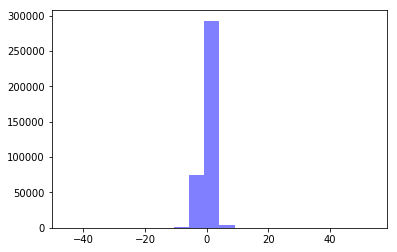

In [15]:
# Plot histogram
plt.hist(data["Change"], 20, facecolor='blue', alpha=0.5)
plt.show()

In [16]:
# Serials the changes into Dataframe (data)
data1 = data.copy()
labels = ["1","2","3","4","5","6","7","8","9","10",
          "11","12","13","14","15","16","17","18","19","20",
          "21","22","23","24","25","26","27","28","29","30",
          "31","32","33","34","35","36","37","38","39","40",
          "41","42","43","44","45","46","47","48","49","50",
          "51","52","53","54","55","56","57","58","59","60"]

for i in range(60) :
    data2 = data1.drop(data1.index[0:i]).copy()
    data2 = data2.reset_index(drop=True)
    data[labels[i]] = data2["Change"]

In [17]:
# Remove first and last hour
data = data.dropna()
data = data.drop(data[(data['Weekday'] == 1) & (data['hour'] == 17)].index)
data = data.drop(data[(data['Weekday'] == 6) & (data['hour'] == 16)].index)

In [18]:
fininfo = pd.read_csv('fininfo.csv')
fininfo.head()

,year,month,day,Weekday,dow_open,euf_open,us_6mn
0,2018,1,2,3,2.480935,2.343,1.61
1,2018,1,3,4,2.485045,2.336,1.59
2,2018,1,4,5,2.496486,2.381,1.6
3,2018,1,5,6,2.511492,2.390,1.58
4,2018,1,8,2,2.530840,2.380,1.6


In [19]:
combined = pd.merge(data,fininfo,on=['year','month','day','Weekday'])
combined.head()

,year,month,day,hour,minute,Weekday,Change,1,2,3,...,54,55,56,57,58,59,60,dow_open,euf_open,us_6mn
0,2018,1,2,0,0,3,0.0,0.0,0.2,-0.1,...,0.5,0.5,0.1,0.0,0.4,0.5,0.5,2.480935,2.343,1.61
1,2018,1,2,0,1,3,0.2,0.2,-0.1,1.0,...,0.5,0.1,0.0,0.4,0.5,0.5,0.7,2.480935,2.343,1.61
2,2018,1,2,0,2,3,-0.1,-0.1,1.0,0.0,...,0.1,0.0,0.4,0.5,0.5,0.7,0.4,2.480935,2.343,1.61
3,2018,1,2,0,3,3,1.0,1.0,0.0,-0.9,...,0.0,0.4,0.5,0.5,0.7,0.4,0.4,2.480935,2.343,1.61
4,2018,1,2,0,4,3,0.0,0.0,-0.9,-0.1,...,0.4,0.5,0.5,0.7,0.4,0.4,0.5,2.480935,2.343,1.61


In [20]:
# Send toi csv file for use in models
combined.to_csv('combined.csv')

In [ ]:
data8 = data[data['hour'] == 8]

In [ ]:
data8.to_csv('series_8.csv')